# Import libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
matches = pd.read_csv('data/matches.csv', parse_dates=['date'])
deliveries = pd.read_csv('data/deliveries.csv')

In [95]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [157]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Lets look at the shape of each dataframes

In [141]:
print('There are {} rows and {} columns on deliveries dataframe.'.format(deliveries.shape[0], deliveries.shape[1]))
print('There are {} rows and {} columns on matches dataframe.'.format(matches.shape[0], matches.shape[1]))

There are 179078 rows and 21 columns on deliveries dataframe.
There are 756 rows and 18 columns on matches dataframe.


#### Merge the two dataframes
I used inner join to merged the two dataframes.

In [153]:
data = matches.merge(deliveries, left_on='id', right_on='match_id')

In [99]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Lets look at the different data types and count the number null values in each column.

In [154]:
# different datatypes in the merged dataframe
dataTypes = data.dtypes 

# count of null values in each columns
nullCnt = data.isnull().sum().sort_values(ascending=False) 

# concatenate
dataProperty = pd.concat([dataTypes, nullCnt], axis=1)

# rename columns
columns = ['data type', 'count of nulls']
dataProperty.columns = columns

# sort by count of nulls
dataProperty.sort_values(by='count of nulls', ascending=False, inplace=True)
dataProperty


,data type,count of nulls
fielder,object,172630
dismissal_kind,object,170244
player_dismissed,object,170244
umpire3,object,150712
city,object,1700
umpire2,object,500
umpire1,object,500
player_of_match,object,372
winner,object,372
non_striker,object,0


Seems all the data types are good.

**To do:**
1. Convert date to datetime

Let's look at the size of the resulting dataframe after merging.

In [101]:
data.shape

(179078, 39)

The resulting dataframe has the same size that of the deliveries dataframe.

#### 

# Data wrangling

There's a lot of missing values on umpire3, player_dismissed, dismissal_kind and fielder. It's normal to have no players being ejected from a match. And some matches don't have neccesarily need for the 3rd umpire. So we can leave the null values on those columns as is.

**To do:**

1. How to deal with missing values in city?
2. There are 372 columns with no winner and players of the match indicated, how to deal with this?
3. There are 500 rows with no umpire1 and umpire2. Given those, is it an official match? What can we do with this?

## 1. What are the most successful teams?
I decided to label the most successful team with the highest number of wins.

In [111]:
# count the win by each team
sucTeam = matches['winner'].value_counts().to_frame()

# rename column
sucTeam.rename(columns={'winner':'Count of Wins'}, inplace=True)
sucTeam.head()

,Count of Wins
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82


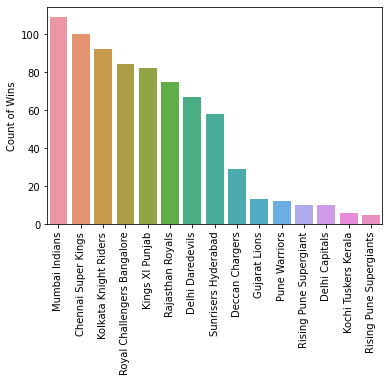

In [118]:
# visualize
sns.barplot(x=sucTeam.index, y='Count of Wins', data=sucTeam)
plt.xticks(rotation='vertical')
plt.show()

In [104]:
print('The most successful team is {}.'.format(sucTeam.index[0]))

The most successful team is Mumbai Indians.


## Who are the most successful players? 
Count the how many times a player became the player of the match. The players with most number of times that become the player of the match are the most successful ones.

In [105]:
# count how many times the player become the player of the match
playerOfMatch = matches['player_of_match'].value_counts().to_frame()

# rename column
playerOfMatch.rename(columns={'player_of_match':'Player of the Match Count'}, inplace=True)
playerOfMatch.head()

,Player of the Match Count
CH Gayle,21
AB de Villiers,20
DA Warner,17
RG Sharma,17
MS Dhoni,17


#### Select top 10 players

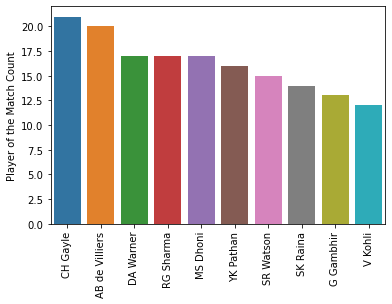

In [126]:
# visualize
sns.barplot(x=topPlayers.index, y='Player of the Match Count', data=topPlayers)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
print('The most successful player is {}.'.format(playerOfMatch.index[0]))

The most successful player is CH Gayle.


## What are the factors contributing win or loss of a team?

**To do:**

1. Does being in the homecourt have an advantage?
2. Does winning the toss coin has impact on the result of the match?
3. After winning the toss coin, does choosing to bat or the field has effect on the winning a match?

In [107]:
batsmanGrp = deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsmanGrp["batsman_runs"].sum().reset_index()
batsmen

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2
11331,11415,2,Chennai Super Kings,RA Jadeja,9
11332,11415,2,Chennai Super Kings,SK Raina,9
11333,11415,2,Chennai Super Kings,SN Thakur,2
